In [2]:
# common
import os
BASE_DIR = os.path.dirname(os.path.dirname(os.path.abspath('__file__')))

from datetime import datetime, timedelta
from io import BytesIO
from pathlib import Path
import json

# network & protocol
import requests
from requests.exceptions import BaseHTTPError

# computational
import numpy as np
import pandas as pd
from scipy.stats import rankdata

# graph
import plotly.express as px
import plotly.graph_objects as go

# custom
import sys
sys.path.append(f'{BASE_DIR}/scripts')
from mrc_download import *



In [3]:
start_date = '2012-01-01'
end_date = '2019-12-31'
date_tail = 'T00:00:00.000Z'
request_param = dict(sd=f'{start_date}{date_tail}', ed=f'{end_date}{date_tail}')
full_dates = pd.date_range(datetime.strptime(start_date, '%Y-%m-%d'),
                           datetime.strptime(end_date, '%Y-%m-%d'), freq='d')\
             .strftime('%Y-%m-%d').tolist()

In [4]:
_stations = pd.read_csv(f'{BASE_DIR}/other_exports/1990_2019_stations.csv')
stations_name = _stations.stationname.unique().tolist()
stations_name.sort()
print(stations_name)

['Battambang', 'Chaktomuk', 'Kg. Thmar', 'Koh Khel', 'Kompong Cham', 'Kompong Chen', 'Kompong Kdei', 'Kompong Thom', 'Kratie', 'Lumphat', 'Neak Luong', 'Phnom Penh Port', 'Prek Kdam', 'Siempang', 'Sisophon', 'Stung Treng', 'Voeun Sai']


In [5]:
date_tail = 'T00:00:00.000Z'
# stage_id: [ manual, telemetry ]
stations = [
    {
        'name': 'Battambang',
        'stage_id': ['cba718574b1f4244a4ae2ef58806732d', '8456239a6baf4221a744886c8cb6efd3'],
        'start_date': '1962-01-01',
        'end_date': '2020-12-31',
    },
    {
        'name': 'Chaktomuk',
        'stage_id': ['7f84c4d851a543d1a5eccc53947e0d3c', '2c070f6a900b41e7ad19bafef374f52d'],
        'start_date': '1959-01-01',
        'end_date': '2020-12-31',
    },
    {
        'name': 'Kompong_Thom',
        'stage_id': ['dae00e365f134b4bbfa6bf4162eb815c', 'aaebd95890ca49b9b5b5a82699159d6d'],
        'start_date': '1960-12-31',
        'end_date': '2020-12-30',
    },
    {
        'name': 'Kratie',
        'stage_id': ['fca7bee14dcf43a59263158f18a88509', '39b735a5de5c440cb0bc789fb9fdd544'],
        'start_date': '1923-12-31',
        'end_date': '2021-05-16',
    },
    {
        'name': 'Lumphat',
        'stage_id': ['93337ffe7838467289bf5b55401ee6f8', '6955b9585cc94524bcff184034e4afd3'],
        'start_date': '1964-12-31',
        'end_date': '2021-05-16',
    },
    {
        'name': 'Prek_Kdam',
        'stage_id': ['81e259eb15f64135834fe9e388ee7fbb', '5a7037f272c745d5bcafcc16a5c2f89c'],
        'start_date': '1960-10-12',
        'end_date': '2018-12-17',
    },
    {
        'name': 'Siempang',
        'stage_id': ['6a49fa1f6cb247d39b9e6c405205bfa3', '5794c0c5c5c045639e0efa1540466828'],
        'start_date': '1964-12-31',
        'end_date': '2012-12-30',
    },
#     {
#         'name': 'Sisophon',
#         'stage_id': ['2a8a001888a84456916ff7a89be300e7', 'f08efea6bd684203ab33c5a316e2459a'],
#         'start_date': '1962-04-01',
#         'end_date': '2002-12-16',
#     },
    {
        'name': 'Stung_Treng',
        'stage_id': ['000e84564d1b425ebcc2c2292ed14061', '0a723f8802e44a6bb12c08dcf1816a83'],
        'start_date': '1909-12-31',
        'end_date': '2021-05-16',
    },
    {
        'name': 'Voeun_Sai',
        'stage_id': ['d177b0f2dae547ceb9bc7c23ef2970ae', 'e821b15baedd4af2a4ecde624b3bc976'],
        'start_date': '1964-12-31',
        'end_date': '2021-05-16',
    },
]

In [6]:
dfs = []

for station in stations:
    stage_id = station['stage_id']
    name = station['name']
    print(f'station {name}')
    
    table = {}
    table['name'] = name
    
    for idx, _id in enumerate(stage_id):
        df = pd.read_csv(f'{BASE_DIR}/mrc_download/{_id}.csv')
        if idx == 0:
            df.rename(columns = {'value': 'manual'}, inplace = True)
            table['manual'] = df
            
        else:
            df.rename(columns = {'value': 'telemetry'}, inplace = True)
            table['telemetry'] = df

    merged_df = pd.merge(table['manual'], table['telemetry'], how='inner', on='datetime')
    print(merged_df.size)
    table['df'] = merged_df

    dfs.append(table)

station Battambang
3930
station Chaktomuk
11778
station Kompong_Thom
4608
station Kratie
9741
station Lumphat
10236
station Prek_Kdam
9597
station Siempang
3882
station Stung_Treng
9624
station Voeun_Sai
10524


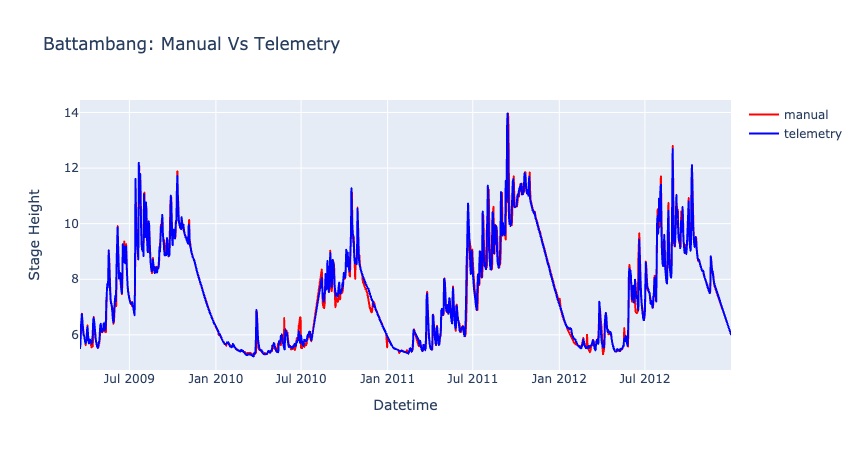

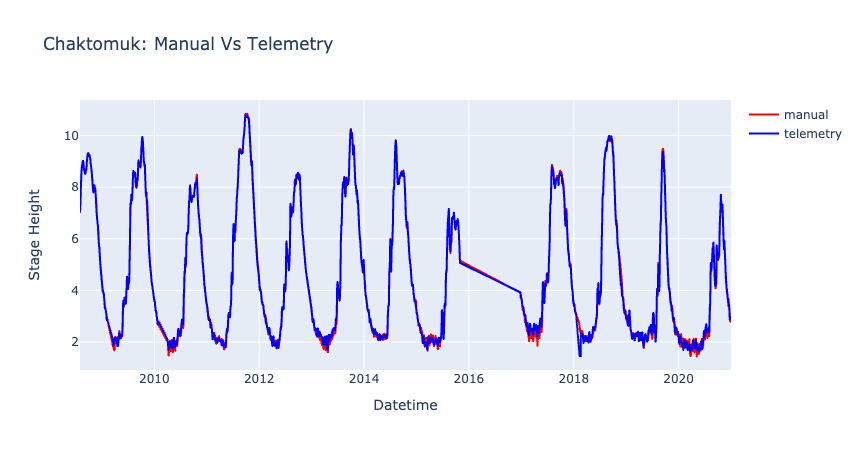

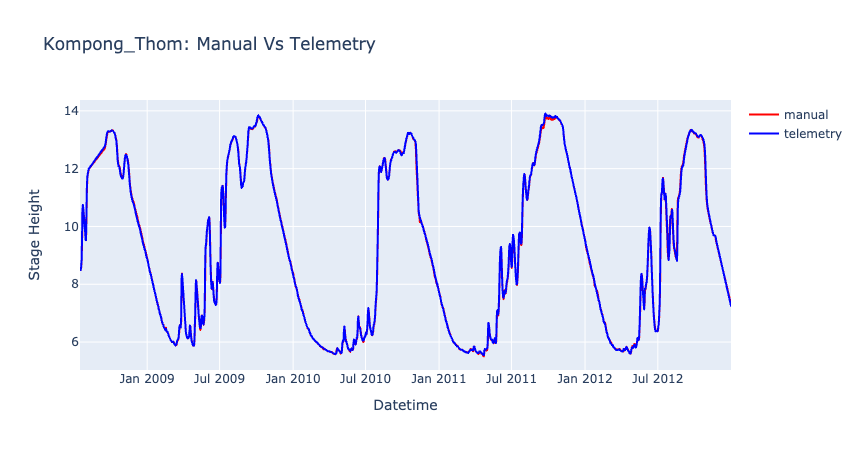

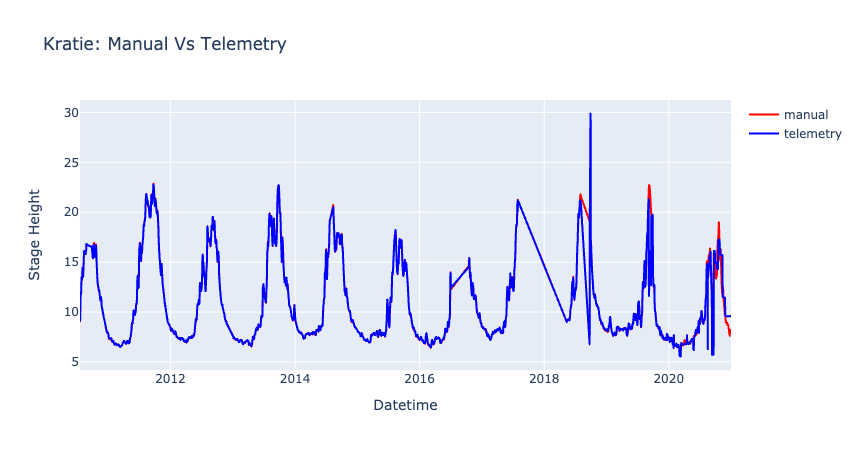

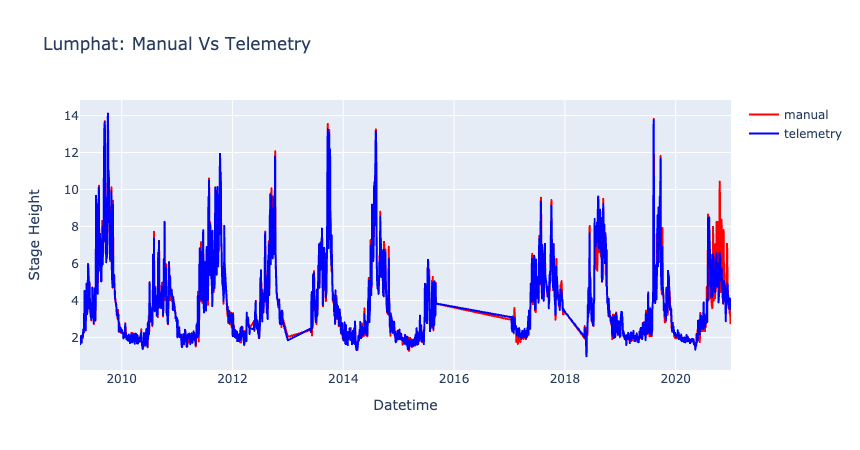

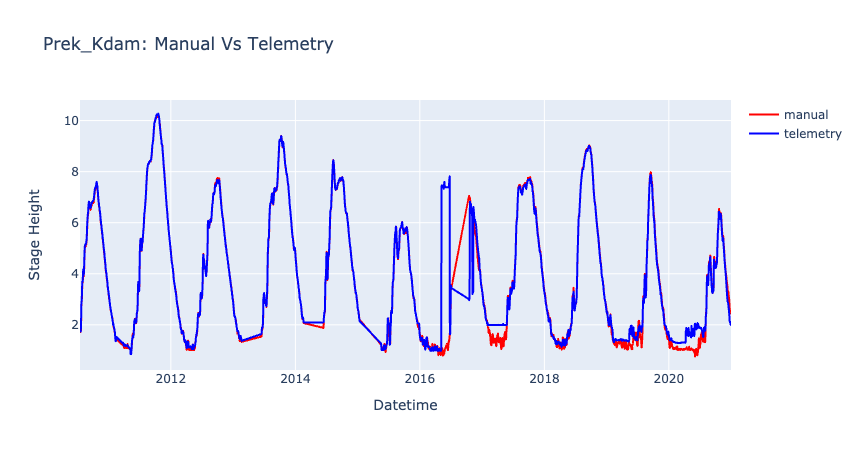

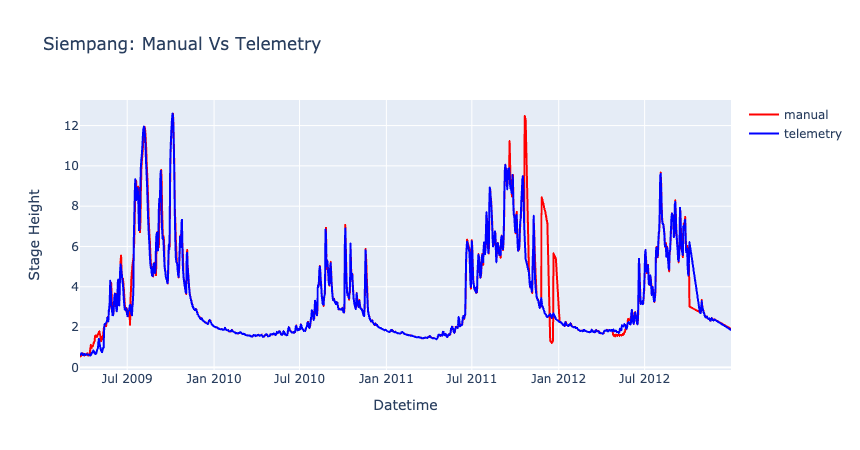

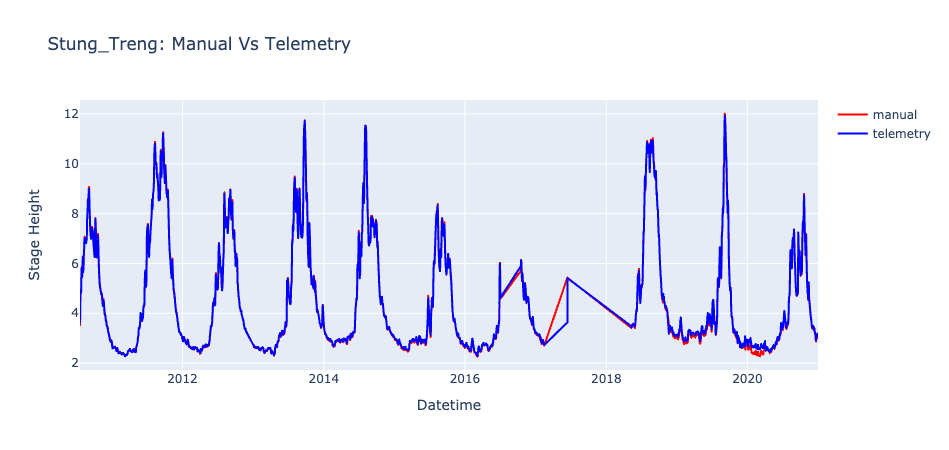

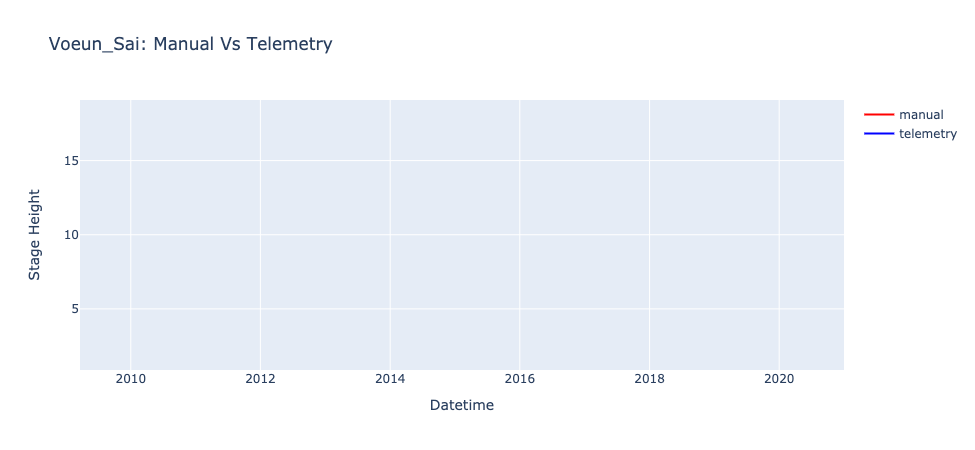

In [7]:
for _df in dfs:
    df = _df['df']
    df.sort_values(by=['datetime'], ascending=True, inplace=True)
    scatter = go.Scattergl(x=df.datetime,
                           y=df.manual,
                           mode='lines',
                           name='manual',
                           marker=dict(color='red')
                          )
    
    scatter2 = go.Scattergl(x=df.datetime,
                            y=df.telemetry,
                            mode='lines',
                            name='telemetry',
                            marker=dict(color='blue')
                           )

    layout = go.Layout(title=f"{_df['name']}: Manual Vs Telemetry",
                       xaxis=dict(title='Datetime'),
                       yaxis=dict(title='Stage Height'),
                       showlegend=True)

    chart_obj = go.Figure(data=[scatter, scatter2], layout=layout)

    chart_obj.show()

In [8]:
for _df in dfs:
    df = _df['df']
    df.sort_values(by=['datetime'], ascending=True, inplace=True)
    manual = df.manual
    telemetry = df.telemetry
    
    print('-------------------------------')
    print(f"station: {_df['name']}")
    
    # mean error
    me = np.mean(manual - telemetry)
    print(f'mean error: {me}')
    
    # mean absolute error
    mae = np.mean(np.absolute(manual - telemetry))
    print(f'mean absolute error: {mae}')
    
    # mean squared error
    mse = np.mean(np.power((manual - telemetry), 2))
    print(f'mean squared error: {mse}')
    
    # root mean squared error
    rmse = np.sqrt(mse)
    print(f'root mean squared error: {rmse}')

    # pearson's correlation coefficient
    manual_mean = np.mean(manual)
    manual_mean_diff = np.subtract(manual, manual_mean)

    telemetry_mean = np.mean(telemetry)
    telemetry_mean_diff = np.subtract(telemetry, telemetry_mean)

    denominator = np.sum(np.multiply(manual_mean_diff, telemetry_mean_diff))
    num1 = np.sum(np.power(manual_mean_diff, 2))
    num2 = np.sum(np.power(telemetry_mean_diff, 2))
    
    pr = denominator / (np.sqrt(np.multiply(num1, num2)))
    
    print(f'pearson correlaton coefficient: {pr}')
    

-------------------------------
station: Battambang
mean error: -0.011321240089215296
mean absolute error: 0.13948205138637698
mean squared error: 0.07718434636638961
root mean squared error: 0.27782070903082373
pearson correlaton coefficient: 0.987854513727493
-------------------------------
station: Chaktomuk
mean error: -0.008131326483601665
mean absolute error: 0.077879948882012
mean squared error: 0.013927662882656063
root mean squared error: 0.1180155196686269
pearson correlaton coefficient: 0.9990075763593925
-------------------------------
station: Kompong_Thom
mean error: -0.007099767735097034
mean absolute error: 0.03687434939566609
mean squared error: 0.004328146853446343
root mean squared error: 0.06578865292317775
pearson correlaton coefficient: 0.9997264488406913
-------------------------------
station: Kratie
mean error: 0.019979012389402445
mean absolute error: 0.17521325238333066
mean squared error: 0.665102689362078
root mean squared error: 0.8155382819721451
pearson 